# Homework 6, Part One: Lots and lots of questions about beer

### Do your importing and your setup

In [1]:
import pandas as pd

In [2]:
pd.read_csv("craftcans.csv", 
            na_values=["Does not apply","NaN",0,""])


Beer              Brewery         Location  \
0                 Get Together    NorthGate Brewing  Minneapolis, MN   
1                Maggie's Leap    NorthGate Brewing  Minneapolis, MN   
2                   Wall's End    NorthGate Brewing  Minneapolis, MN   
3                      Pumpion    NorthGate Brewing  Minneapolis, MN   
4                   Stronghold    NorthGate Brewing  Minneapolis, MN   
...                        ...                  ...              ...   
2411  Mama's Little Yella Pils  Oskar Blues Brewery     Longmont, CO   
2412        GUBNA Imperial IPA  Oskar Blues Brewery     Longmont, CO   
2413                  Old Chub  Oskar Blues Brewery     Longmont, CO   
2414         Gordon Ale (2009)  Oskar Blues Brewery     Longmont, CO   
2415           Dale's Pale Ale  Oskar Blues Brewery     Longmont, CO   

                               Style    Size    ABV   IBUs  
0                       American IPA  16 oz.  4.50%   50.0  
1                 Milk / Sweet Stout  16 oz.  4.90%   26.0  
2                  English Brown Ale  16 oz.  4.80%   19.0  
3                        Pumpkin Ale  16 oz.  6.00%   38.0  
4                    American Porter  16 oz.  6.00%   25.0  
...                              ...     ...    ...    ...  
2411                  Czech Pilsener  12 oz.  5.30%   35.0  
2412  American Double / Imperial IPA  12 oz.  9.90%  100.0  
2413                    Scottish Ale  12 oz.  8.00%   35.0  
2414  American Double / Imperial IPA  12 oz.  8.70%   85.0  
2415         American Pale Ale (APA)  12 oz.  6.50%   65.0  

[2416 rows x 7 columns]

## Read in the file `craftcans.csv`, and look at the first first rows

In [3]:
df = pd.read_csv("craftcans.csv")

In [4]:
df.head(5)

Beer            Brewery         Location               Style  \
0   Get Together  NorthGate Brewing  Minneapolis, MN        American IPA   
1  Maggie's Leap  NorthGate Brewing  Minneapolis, MN  Milk / Sweet Stout   
2     Wall's End  NorthGate Brewing  Minneapolis, MN   English Brown Ale   
3        Pumpion  NorthGate Brewing  Minneapolis, MN         Pumpkin Ale   
4     Stronghold  NorthGate Brewing  Minneapolis, MN     American Porter   

     Size    ABV IBUs  
0  16 oz.  4.50%   50  
1  16 oz.  4.90%   26  
2  16 oz.  4.80%   19  
3  16 oz.  6.00%   38  
4  16 oz.  6.00%   25

## How many rows do you have in the data? What are the column types?

In [5]:
df.shape
#2416 rows, seven columns

(2416, 7)

In [6]:
df.dtypes


Beer        object
Brewery     object
Location    object
Style       object
Size        object
ABV         object
IBUs        object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Beer      2416 non-null   object
 1   Brewery   2410 non-null   object
 2   Location  2410 non-null   object
 3   Style     2405 non-null   object
 4   Size      2410 non-null   object
 5   ABV       2348 non-null   object
 6   IBUs      2410 non-null   object
dtypes: object(7)
memory usage: 132.2+ KB


# Checking out our alcohol

## What are the top 10 producers of cans of beer?

In [8]:
df.Brewery.value_counts().head(10)

Brewery Vivant                62
Oskar Blues Brewery           46
Sun King Brewing Company      38
Cigar City Brewing Company    25
Sixpoint Craft Ales           24
Hopworks Urban Brewery        23
Stevens Point Brewery         22
Great Crescent Brewery        20
21st Amendment Brewery        20
Bonfire Brewing Company       19
Name: Brewery, dtype: int64

## What is the most common ABV? (alcohol by volume)

In [9]:
df.ABV.value_counts().head(1)

5.00%    215
Name: ABV, dtype: int64

## Oh, weird, ABV isn't a number. Convert it to a number for me, please.

It's going to take a few steps!

### First, let's just look at the ABV column by itself

In [10]:
df.ABV

0       4.50%
1       4.90%
2       4.80%
3       6.00%
4       6.00%
        ...  
2411    5.30%
2412    9.90%
2413    8.00%
2414    8.70%
2415    6.50%
Name: ABV, Length: 2416, dtype: object

### Hm, `%` isn't part of  a number. Let's remove it.

When you're confident you got it right, save the results back into the `ABV` column.

- *Tip: In programming the easiest way to remove something is to *replacing it with nothing*.
- *Tip: "nothing" might seem like `NaN` sinc we talked about it a lot in class, but in this case it isn't! It's just an empty string, like ""*
- *Tip: `.replace` is used for replacing ENTIRE cells, while `.str.replace` is useful for replacing PARTS of cells (see my New York example)*

In [11]:
df.ABV.str.replace("%","")

0       4.50
1       4.90
2       4.80
3       6.00
4       6.00
        ... 
2411    5.30
2412    9.90
2413    8.00
2414    8.70
2415    6.50
Name: ABV, Length: 2416, dtype: object

### Now let's turn `ABV` into a numeric data type

Save the results back into the `ABV` column (again), and then check `df.dtypes` to make sure it worked.

- *Tip: We used `.astype(int)` during class, but this has a decimal in it...*

In [12]:
pre_numeric=df.ABV.str.replace("%","")
post_numeric=pre_numeric.astype(float)
post_numeric

0       4.5
1       4.9
2       4.8
3       6.0
4       6.0
       ... 
2411    5.3
2412    9.9
2413    8.0
2414    8.7
2415    6.5
Name: ABV, Length: 2416, dtype: float64

In [13]:
df['ABV'] = post_numeric


In [14]:
df.dtypes

Beer         object
Brewery      object
Location     object
Style        object
Size         object
ABV         float64
IBUs         object
dtype: object

## What's the ABV of the average beer look like?

### Show me in two different ways: one command to show the `median`/`mean`/etc, and secondly show me a chart

In [15]:
df.ABV.mean()

5.977342419080068

In [16]:
df.ABV.median()

5.6

In [17]:
df.ABV.describe()

count    2348.000000
mean        5.977342
std         1.354173
min         0.100000
25%         5.000000
50%         5.600000
75%         6.700000
max        12.800000
Name: ABV, dtype: float64

<AxesSubplot: >

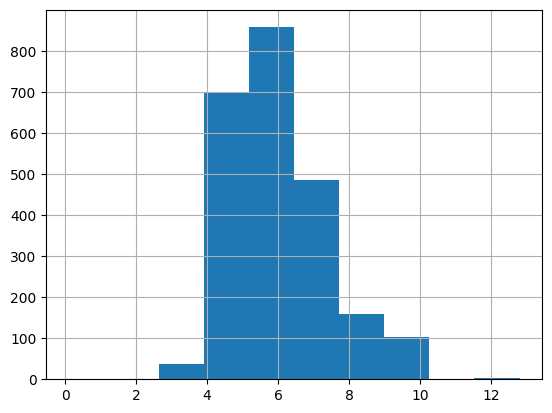

In [18]:
df.ABV.hist()

### We don't have ABV for all of the beers, how many are we missing them from?

- *Tip: You can use `isnull()` or `notnull()` to see where a column is missing data.*
- *Tip: You just want to count how many `True`s and `False`s there are.*
- *Tip: It's a weird trick involving something we usually use to count things in a column*

In [19]:
df[df.ABV.isna()]
#68 because 68 rows

Beer                     Brewery           Location  \
94                  Bastian  James Page Brewing Company  Stevens Point, WI   
199         Professor Black            Blue Owl Brewing         Austin, TX   
200             Little Boss            Blue Owl Brewing         Austin, TX   
201              Van Dayum!            Blue Owl Brewing         Austin, TX   
202           Spirit Animal            Blue Owl Brewing         Austin, TX   
...                     ...                         ...                ...   
2357  Lift Bridge Brown Ale    Keweenaw Brewing Company       Houghton, MI   
2358    Pick Axe Blonde Ale    Keweenaw Brewing Company       Houghton, MI   
2359   Red Jacket Amber Ale    Keweenaw Brewing Company       Houghton, MI   
2374        (16 oz.) (2010)                         NaN                NaN   
2376        (16 oz.) (2010)                         NaN                NaN   

                         Style    Size  ABV            IBUs  
94         American Strong Ale  12 oz.  NaN  Does not apply  
199             American Stout  12 oz.  NaN  Does not apply  
200    American Pale Wheat Ale  12 oz.  NaN  Does not apply  
201   American Amber / Red Ale  12 oz.  NaN  Does not apply  
202    American Pale Ale (APA)  12 oz.  NaN  Does not apply  
...                        ...     ...  ...             ...  
2357        American Brown Ale  12 oz.  NaN  Does not apply  
2358       American Blonde Ale  12 oz.  NaN  Does not apply  
2359  American Amber / Red Ale  12 oz.  NaN  Does not apply  
2374                       NaN     NaN  NaN             NaN  
2376                       NaN     NaN  NaN             NaN  

[68 rows x 7 columns]

In [20]:
df.ABV.value_counts(dropna=False).head(20)
#NaN is 68 rows

5.0    215
5.5    158
6.0    125
6.5    123
5.2    107
7.0     92
4.5     89
4.8     72
NaN     68
5.8     66
5.6     66
5.1     62
5.3     60
4.9     59
6.2     59
8.0     57
4.7     57
6.8     52
5.7     52
5.4     50
Name: ABV, dtype: int64

# Looking at location

Brooklyn used to produce 80% of the country's beer! Let's see if it's still true.

## What are the top 10 cities in the US for canned craft beer?

In [21]:
df.Location.value_counts().head(10)


Grand Rapids, MI    66
Chicago, IL         55
Portland, OR        52
Indianapolis, IN    43
San Diego, CA       42
Boulder, CO         41
Denver, CO          40
Brooklyn, NY        38
Seattle, WA         35
Longmont, CO        33
Name: Location, dtype: int64

## List all of the beer from Brooklyn, NY

In [22]:
brooklyn_beer=df[df.Location == 'Brooklyn, NY']
brooklyn_beer

Beer              Brewery      Location  \
115                            4Beans  Sixpoint Craft Ales  Brooklyn, NY   
210                            Jammer  Sixpoint Craft Ales  Brooklyn, NY   
246                           Abigale  Sixpoint Craft Ales  Brooklyn, NY   
404                     Nomader Weiss    Evil Twin Brewing  Brooklyn, NY   
421                               Rad  Sixpoint Craft Ales  Brooklyn, NY   
439                      Molotov Lite    Evil Twin Brewing  Brooklyn, NY   
588                           Bengali  Sixpoint Craft Ales  Brooklyn, NY   
713                     Sensi Harvest  Sixpoint Craft Ales  Brooklyn, NY   
969                            Hi-Res  Sixpoint Craft Ales  Brooklyn, NY   
987             KelSo Nut Brown Lager   KelSo Beer Company  Brooklyn, NY   
1057                    Global Warmer  Sixpoint Craft Ales  Brooklyn, NY   
1074               Autumnation (2013)  Sixpoint Craft Ales  Brooklyn, NY   
1093             KelSo India Pale Ale   KelSo Beer Company  Brooklyn, NY   
1267                        The Crisp  Sixpoint Craft Ales  Brooklyn, NY   
1268                     Sweet Action  Sixpoint Craft Ales  Brooklyn, NY   
1269                    Righteous Ale  Sixpoint Craft Ales  Brooklyn, NY   
1270                    Bengali Tiger  Sixpoint Craft Ales  Brooklyn, NY   
1305                    KelSo Pilsner   KelSo Beer Company  Brooklyn, NY   
1365  Hipster Ale (Two Roads Brewing)    Evil Twin Brewing  Brooklyn, NY   
1366                      Bikini Beer    Evil Twin Brewing  Brooklyn, NY   
1373              East India Pale Ale     Brooklyn Brewery  Brooklyn, NY   
1624                           3Beans  Sixpoint Craft Ales  Brooklyn, NY   
1836                       Brownstone  Sixpoint Craft Ales  Brooklyn, NY   
1857              Brooklyn Summer Ale     Brooklyn Brewery  Brooklyn, NY   
1962  Hipster Ale (Westbrook Brewing)    Evil Twin Brewing  Brooklyn, NY   
1970                           Apollo  Sixpoint Craft Ales  Brooklyn, NY   
1971                        Harbinger  Sixpoint Craft Ales  Brooklyn, NY   
1972                            Resin  Sixpoint Craft Ales  Brooklyn, NY   
2027              East India Pale Ale     Brooklyn Brewery  Brooklyn, NY   
2062                           Diesel  Sixpoint Craft Ales  Brooklyn, NY   
2074     Autumnation (2011-12) (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2140                 The Crisp (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2141              Sweet Action (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2142             Righteous Ale (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2143             Bengali Tiger (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2219       Brooklyn Summer Ale (2011)     Brooklyn Brewery  Brooklyn, NY   
2350          Brooklyn Lager (16 oz.)     Brooklyn Brewery  Brooklyn, NY   
2351          Brooklyn Lager (12 oz.)     Brooklyn Brewery  Brooklyn, NY   

                               Style               Size   ABV            IBUs  
115                    Baltic Porter             12 oz.  10.0              52  
210                             Gose    12 oz. Slimline   4.2              16  
246                 Belgian Pale Ale             12 oz.   8.0  Does not apply  
404               Berliner Weissbier             12 oz.   4.0  Does not apply  
421           Fruit / Vegetable Beer             16 oz.   3.2               7  
439   American Double / Imperial IPA             16 oz.   8.5  Does not apply  
588                     American IPA  24 oz. "Silo Can"   6.5              62  
713          American Pale Ale (APA)             12 oz.   4.7              50  
969   American Double / Imperial IPA             12 oz.   9.9             111  
987                  Euro Dark Lager             12 oz.   5.7              19  
1057             American Strong Ale             12 oz.   7.0              70  
1074                    American IPA             16 oz.   6.7              74  
1093                    Amer

## What brewery in Brooklyn puts out the most cans of beer?

In [23]:
brooklyn_beer.Brewery.value_counts().head(1)

Sixpoint Craft Ales    24
Name: Brewery, dtype: int64

## What are the five most popular styles of beer produced by Sixpoint?

In [24]:
brooklyn_beer.groupby('Brewery').Style.value_counts()

Brewery              Style                         
Brooklyn Brewery     American Amber / Red Lager        2
                     English India Pale Ale (IPA)      2
                     English Pale Mild Ale             2
Evil Twin Brewing    American Pale Ale (APA)           2
                     American Double / Imperial IPA    1
                     American IPA                      1
                     Berliner Weissbier                1
KelSo Beer Company   American IPA                      1
                     Czech Pilsener                    1
                     Euro Dark Lager                   1
Sixpoint Craft Ales  American IPA                      4
                     American Double / Imperial IPA    2
                     Baltic Porter                     2
                     Cream Ale                         2
                     German Pilsener                   2
                     Rye Beer                          2
                     American Brown 

In [25]:
six_point=brooklyn_beer[brooklyn_beer.Brewery == 'Sixpoint Craft Ales']
six_point

Beer              Brewery      Location  \
115                         4Beans  Sixpoint Craft Ales  Brooklyn, NY   
210                         Jammer  Sixpoint Craft Ales  Brooklyn, NY   
246                        Abigale  Sixpoint Craft Ales  Brooklyn, NY   
421                            Rad  Sixpoint Craft Ales  Brooklyn, NY   
588                        Bengali  Sixpoint Craft Ales  Brooklyn, NY   
713                  Sensi Harvest  Sixpoint Craft Ales  Brooklyn, NY   
969                         Hi-Res  Sixpoint Craft Ales  Brooklyn, NY   
1057                 Global Warmer  Sixpoint Craft Ales  Brooklyn, NY   
1074            Autumnation (2013)  Sixpoint Craft Ales  Brooklyn, NY   
1267                     The Crisp  Sixpoint Craft Ales  Brooklyn, NY   
1268                  Sweet Action  Sixpoint Craft Ales  Brooklyn, NY   
1269                 Righteous Ale  Sixpoint Craft Ales  Brooklyn, NY   
1270                 Bengali Tiger  Sixpoint Craft Ales  Brooklyn, NY   
1624                        3Beans  Sixpoint Craft Ales  Brooklyn, NY   
1836                    Brownstone  Sixpoint Craft Ales  Brooklyn, NY   
1970                        Apollo  Sixpoint Craft Ales  Brooklyn, NY   
1971                     Harbinger  Sixpoint Craft Ales  Brooklyn, NY   
1972                         Resin  Sixpoint Craft Ales  Brooklyn, NY   
2062                        Diesel  Sixpoint Craft Ales  Brooklyn, NY   
2074  Autumnation (2011-12) (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2140              The Crisp (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2141           Sweet Action (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2142          Righteous Ale (2011)  Sixpoint Craft Ales  Brooklyn, NY   
2143          Bengali Tiger (2011)  Sixpoint Craft Ales  Brooklyn, NY   

                               Style               Size   ABV            IBUs  
115                    Baltic Porter             12 oz.  10.0              52  
210                             Gose    12 oz. Slimline   4.2              16  
246                 Belgian Pale Ale             12 oz.   8.0  Does not apply  
421           Fruit / Vegetable Beer             16 oz.   3.2               7  
588                     American IPA  24 oz. "Silo Can"   6.5              62  
713          American Pale Ale (APA)             12 oz.   4.7              50  
969   American Double / Imperial IPA             12 oz.   9.9             111  
1057             American Strong Ale             12 oz.   7.0              70  
1074                    American IPA             16 oz.   6.7              74  
1267                 German Pilsener             16 oz.   5.4              42  
1268                       Cream Ale             16 oz.   5.2              34  
1269                        Rye Beer             16 oz.   6.3              57  
1270                    American IPA             16 oz.   6.4              62  
1624                   Baltic Porter             12 oz.   9.9              85  
1836              American Brown Ale             16 oz.   5.9              47  
1970         American Pale Wheat Ale             16 oz.   5.2              11  
1971          Saison / Farmhouse Ale             16 oz.   4.9              35  
1972  American Double / Imperial IPA             12 oz.   9.1             103  
2062                  American Stout             16 oz.   6.3              69  
2074                     Pumpkin Ale             16 oz.   6.0              48  
2140                 German Pilsener             16 oz.   5.4              42  
2141                       Cream Ale             16 oz.   5.2              34  
2142                        Rye Beer             16 oz.   6.3              57  
2143                    American IPA             16 oz.   6.4              62

In [26]:
six_point.Style.value_counts().head(5)

American IPA                      4
Baltic Porter                     2
American Double / Imperial IPA    2
German Pilsener                   2
Cream Ale                         2
Name: Style, dtype: int64

## List all of the breweries in New York state.

- *Tip: We want to match *part* of the `Location` column, but not all of it.*
- *Tip: Watch out for `NaN` values! You might be close, but you'll need to pass an extra parameter to make it work without an error.*

In [27]:
#df.Narrative_1.str.extract("PUNCHED (\w*)").dropna()
# df[df.Location.str.contains("NY")]
ny_df=df[df.Location.str.contains("NY", na=False)]
ny_df

Beer                  Brewery           Location  \
115                     4Beans      Sixpoint Craft Ales       Brooklyn, NY   
210                     Jammer      Sixpoint Craft Ales       Brooklyn, NY   
246                    Abigale      Sixpoint Craft Ales       Brooklyn, NY   
404              Nomader Weiss        Evil Twin Brewing       Brooklyn, NY   
421                        Rad      Sixpoint Craft Ales       Brooklyn, NY   
...                        ...                      ...                ...   
2351   Brooklyn Lager (12 oz.)         Brooklyn Brewery       Brooklyn, NY   
2364  Heinnieweisse Weissebier  Butternuts Beer and Ale  Garrattsville, NY   
2365           Snapperhead IPA  Butternuts Beer and Ale  Garrattsville, NY   
2366         Moo Thunder Stout  Butternuts Beer and Ale  Garrattsville, NY   
2367         Porkslap Pale Ale  Butternuts Beer and Ale  Garrattsville, NY   

                           Style             Size   ABV            IBUs  
115                Baltic Porter           12 oz.  10.0              52  
210                         Gose  12 oz. Slimline   4.2              16  
246             Belgian Pale Ale           12 oz.   8.0  Does not apply  
404           Berliner Weissbier           12 oz.   4.0  Does not apply  
421       Fruit / Vegetable Beer           16 oz.   3.2               7  
...                          ...              ...   ...             ...  
2351  American Amber / Red Lager           12 oz.   5.2  Does not apply  
2364                  Hefeweizen           12 oz.   4.9  Does not apply  
2365                American IPA           12 oz.   6.8  Does not apply  
2366          Milk / Sweet Stout           12 oz.   4.9  Does not apply  
2367     American Pale Ale (APA)           12 oz.   4.3  Does not apply  

[74 rows x 7 columns]

### Now *count* all of the breweries in New York state

In [28]:
ny_df.Brewery.count()

74

# Measuring International Bitterness Units

## Display all of the IPAs

Include American IPAs, Imperial IPAs, and anything else with "IPA in it."

IPA stands for [India Pale Ale](https://www.bonappetit.com/story/ipa-beer-styles), and is probably the most popular kind of beer in the US for people who are drinking [craft beer](https://www.craftbeer.com/beer/what-is-craft-beer).

In [29]:
df.IBUs

0        50
1        26
2        19
3        38
4        25
       ... 
2411     35
2412    100
2413     35
2414     85
2415     65
Name: IBUs, Length: 2416, dtype: object

In [30]:
df[df.Style.str.contains("IPA", na=False)]

Beer                    Brewery             Location  \
0              Get Together          NorthGate Brewing      Minneapolis, MN   
6            Citra Ass Down  Against the Grain Brewery       Louisville, KY   
14              Rico Sauvin  Against the Grain Brewery       Louisville, KY   
17             Pile of Face  Against the Grain Brewery       Louisville, KY   
24           Habitus (2014)  Mike Hess Brewing Company        San Diego, CA   
...                     ...                        ...                  ...   
2403           Abrasive Ale      Surly Brewing Company  Brooklyn Center, MN   
2406                Furious      Surly Brewing Company  Brooklyn Center, MN   
2408  Brew Free! or Die IPA     21st Amendment Brewery    San Francisco, CA   
2412     GUBNA Imperial IPA        Oskar Blues Brewery         Longmont, CO   
2414      Gordon Ale (2009)        Oskar Blues Brewery         Longmont, CO   

                               Style    Size  ABV IBUs  
0                       American IPA  16 oz.  4.5   50  
6     American Double / Imperial IPA  16 oz.  8.0   68  
14    American Double / Imperial IPA  16 oz.  7.6   68  
17                      American IPA  16 oz.  6.0   65  
24    American Double / Imperial IPA  16 oz.  8.0  100  
...                              ...     ...  ...  ...  
2403  American Double / Imperial IPA  16 oz.  9.7  120  
2406                    American IPA  16 oz.  6.2   99  
2408                    American IPA  12 oz.  7.0   65  
2412  American Double / Imperial IPA  12 oz.  9.9  100  
2414  American Double / Imperial IPA  12 oz.  8.7   85  

[571 rows x 7 columns]

IPAs are usually pretty hoppy and bitter. IBU stands for [International Bitterness Unit](http://www.thebrewenthusiast.com/ibus/), and while a lot of places like to brag about having the most bitter beer (it's an American thing!), IBUs don't necessary *mean anything*.

Let's look at how different beers have different IBU measurements.

## Try to get the average IBU measurement across all beers

In [31]:
df.IBUs.mean()

TypeError: can only concatenate str (not "int") to str

In [32]:
df[df.IBUs.isna()]

Beer Brewery Location Style Size  ABV IBUs
2025           12 oz.     NaN      NaN   NaN  NaN  NaN  NaN
2160         (24 oz.)     NaN      NaN   NaN  NaN  NaN  NaN
2226         (12 oz.)     NaN      NaN   NaN  NaN  NaN  NaN
2276         (12 oz.)     NaN      NaN   NaN  NaN  NaN  NaN
2374  (16 oz.) (2010)     NaN      NaN   NaN  NaN  NaN  NaN
2376  (16 oz.) (2010)     NaN      NaN   NaN  NaN  NaN  NaN

### Oh no, it doesn't work!

It looks like some of those values *aren't numbers*. There are two ways to fix this:

1. Do the `.replace` and `np.nan` thing we did in class. Then convert the column to a number. This is boring.
2. When you're reading in your csv, there [is an option called `na_values`](http://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html). You can give it a list of **numbers or strings to count as `NaN`**. It's a lot easier than doing the `np.nan` thing, although you'll need to go add it up top and run all of your cells again.

- *Tip: Make sure you're giving `na_values` a LIST, not just a string*

### Now try to get the average IBUs again

In [33]:
df = df.dropna(subset=['IBUs'])

In [34]:
df[df.IBUs.isna()]

Empty DataFrame
Columns: [Beer, Brewery, Location, Style, Size, ABV, IBUs]
Index: []

In [35]:
df.IBUs.mean()

TypeError: Could not convert 50261938254768802542252113176838Does not apply652018158065451008524100302819161742Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply75Does not applyDoes not apply3554Does not applyDoes not applyDoes not apply12471015Does not apply65403572Does not apply50Does not apply20129075Does not apply4664313727Does not applyDoes not applyDoes not apply9058Does not applyDoes not applyDoes not apply2923Does not apply45229020Does not applyDoes not apply80Does not apply35Does not applyDoes not applyDoes not apply45Does not apply2611Does not apply60820Does not applyDoes not applyDoes not apply100Does not applyDoes not apply403452Does not applyDoes not applyDoes not applyDoes not apply4735Does not apply70Does not applyDoes not apply2451Does not applyDoes not applyDoes not apply44Does not apply2720Does not apply45Does not applyDoes not apply1640Does not applyDoes not applyDoes not apply1118Does not applyDoes not applyDoes not apply682046Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply8Does not applyDoes not apply2733Does not apply20Does not apply1070582Does not applyDoes not apply1745Does not apply251875192345901022Does not apply11512Does not applyDoes not applyDoes not applyDoes not apply69Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply351620Does not apply21Does not applyDoes not apply1640Does not applyDoes not apply40Does not apply55Does not apply115Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply75Does not applyDoes not apply65116330Does not applyDoes not applyDoes not applyDoes not apply424267Does not applyDoes not applyDoes not applyDoes not applyDoes not apply93Does not applyDoes not apply66126Does not apply1175Does not apply1040Does not apply61Does not applyDoes not applyDoes not applyDoes not apply287036704572118516Does not apply82Does not apply100402116Does not apply87Does not applyDoes not apply883533222036103202020202020202020202020604565Does not apply17Does not applyDoes not applyDoes not apply581040Does not apply616Does not apply75Does not apply5Does not applyDoes not apply2599Does not applyDoes not apply72Does not apply14Does not applyDoes not applyDoes not applyDoes not apply25Does not applyDoes not apply49Does not apply3225Does not apply186510Does not apply89Does not apply28Does not apply43Does not applyDoes not applyDoes not apply722936Does not apply70Does not apply471130Does not applyDoes not apply60Does not applyDoes not apply4518Does not apply4082100447160Does not apply101720Does not apply157036223542Does not applyDoes not applyDoes not apply602021682560Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply27Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply33Does not apply47Does not apply7Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply227321Does not apply3340Does not applyDoes not apply2543Does not applyDoes not applyDoes not applyDoes not applyDoes not apply651221Does not apply41Does not apply8813706098028183020Does not applyDoes not applyDoes not apply65501518Does not apply25351925Does not apply1870Does not applyDoes not apply40Does not apply4530183575553514206970Does not apply5350622045757522Does not applyDoes not applyDoes not applyDoes not applyDoes not apply27234277Does not applyDoes not applyDoes not applyDoes not apply624010023Does not apply241685867550Does not apply7530964Does not apply60Does not apply38Does not apply17Does not apply253525Does not apply35Does not applyDoes not applyDoes not applyDoes not applyDoes not apply60Does not apply212135402011899Does not apply352312699Does not applyDoes not apply1865Does not apply1252Does not apply4017Does not applyDoes not applyDoes not apply22Does not applyDoes not applyDoes not apply813810061Does not applyDoes not apply62558016Does not apply20233630236940Does not apply501526Does not apply25Does not apply273535431306435309916Does not apply1515Does not applyDoes not apply452240Does not apply704535Does not applyDoes not applyDoes not apply7569203050Does not applyDoes not apply75Does not apply30Does not applyDoes not apply1831353065Does not applyDoes not apply4076Does not applyDoes not applyDoes not apply12Does not apply830Does not applyDoes not apply6565Does not applyDoes not applyDoes not applyDoes not applyDoes not apply55Does not apply60Does not applyDoes not apply88757575Does not applyDoes not apply75Does not apply18352118Does not applyDoes not apply29Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply6021Does not applyDoes not applyDoes not applyDoes not applyDoes not apply1840Does not apply22204855702848503935Does not applyDoes not applyDoes not applyDoes not applyDoes not apply55Does not applyDoes not apply15Does not applyDoes not applyDoes not applyDoes not apply55Does not applyDoes not applyDoes not applyDoes not apply980Does not apply72Does not apply3045156533Does not apply6180351042423049Does not apply4018Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply2250Does not apply18Does not apply452849372790326840Does not apply358446540773034Does not apply8522441680Does not apply1616Does not applyDoes not applyDoes not applyDoes not applyDoes not apply43734020281566402285Does not applyDoes not apply306787Does not applyDoes not apply30752583453444375550Does not apply40Does not apply243030302528454060818Does not applyDoes not applyDoes not apply75Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply1140612080Does not applyDoes not apply15Does not applyDoes not apply10835Does not applyDoes not applyDoes not apply602128Does not applyDoes not applyDoes not apply72Does not apply373920Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply4274Does not apply3020Does not apply6055252320405368Does not applyDoes not apply1045131Does not applyDoes not apply186035Does not applyDoes not applyDoes not applyDoes not apply4516463780Does not applyDoes not applyDoes not apply152385Does not applyDoes not apply35Does not applyDoes not apply20Does not applyDoes not apply3125110226060Does not apply8332Does not applyDoes not applyDoes not apply21Does not applyDoes not apply65403526Does not applyDoes not applyDoes not applyDoes not applyDoes not apply11Does not applyDoes not apply336027227069111Does not apply60606022Does not applyDoes not apply42207564Does not applyDoes not applyDoes not applyDoes not apply75Does not apply197013595938825494424277010Does not apply80Does not apply22482770Does not applyDoes not apply30Does not apply6045Does not applyDoes not applyDoes not apply15859977222045Does not apply92Does not applyDoes not applyDoes not applyDoes not applyDoes not apply21Does not applyDoes not applyDoes not applyDoes not apply4345Does not applyDoes not applyDoes not apply21Does not applyDoes not apply318017100Does not apply24Does not apply323026Does not applyDoes not apply1049270Does not apply5560585Does not applyDoes not applyDoes not apply55Does not applyDoes not apply10010035Does not applyDoes not apply74Does not applyDoes not apply16Does not apply18935Does not applyDoes not apply604022207880Does not apply22526429Does not applyDoes not applyDoes not applyDoes not applyDoes not apply65Does not applyDoes not apply3410125Does not apply406910Does not apply28Does not apply5594Does not apply6030222070Does not applyDoes not applyDoes not apply65Does not applyDoes not applyDoes not applyDoes not apply8598Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply9651330Does not applyDoes not applyDoes not applyDoes not apply2530695025851130625480Does not applyDoes not applyDoes not applyDoes not applyDoes not apply100Does not apply3046401152460158565Does not applyDoes not apply18Does not applyDoes not apply51Does not apply355511Does not applyDoes not applyDoes not applyDoes not apply612315Does not applyDoes not applyDoes not applyDoes not apply171521447525Does not apply605820202070Does not apply115Does not applyDoes not applyDoes not applyDoes not apply65Does not apply100Does not applyDoes not apply35Does not applyDoes not applyDoes not apply1970Does not applyDoes not applyDoes not applyDoes not applyDoes not apply21Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply7755856Does not applyDoes not applyDoes not applyDoes not apply25Does not apply161755Does not apply252074237565609663520752065205042345762751974Does not apply2842Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply42Does not apply7523Does not applyDoes not apply25Does not apply1838Does not apply1530141390Does not apply3043023Does not apply86Does not applyDoes not applyDoes not applyDoes not applyDoes not apply2026Does not applyDoes not apply1885502018Does not applyDoes not apply8580151645Does not apply45Does not applyDoes not applyDoes not apply2020Does not apply90Does not apply305Does not apply306555Does not applyDoes not applyDoes not applyDoes not applyDoes not apply60Does not apply32Does not applyDoes not apply156028Does not applyDoes not applyDoes not apply35Does not apply8025Does not applyDoes not applyDoes not apply17326515Does not apply47Does not applyDoes not applyDoes not applyDoes not apply18Does not apply24Does not apply553323Does not applyDoes not apply86Does not apply11Does not apply34244266438576Does not apply3865Does not applyDoes not apply704042Does not applyDoes not apply20Does not apply5010353818342120Does not applyDoes not applyDoes not applyDoes not apply9523Does not apply427Does not apply42Does not apply1318Does not applyDoes not apply25Does not apply5517Does not apply40Does not apply18Does not applyDoes not apply52Does not applyDoes not apply252620751615202545Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply1520Does not applyDoes not apply4536Does not applyDoes not applyDoes not applyDoes not apply7010035Does not apply7010Does not applyDoes not applyDoes not apply30356526Does not applyDoes not apply35Does not apply10046Does not applyDoes not applyDoes not applyDoes not applyDoes not apply20Does not apply3212Does not apply65101529730707065Does not apply2533Does not apply60Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply272370323018Does not apply36402060Does not apply27Does not apply1369120Does not apply7018Does not apply30Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply32Does not applyDoes not applyDoes not apply24Does not apply52338234Does not apply506042Does not apply51Does not apply3030Does not applyDoes not apply20158518Does not apply2085Does not apply653020Does not applyDoes not applyDoes not apply192631Does not applyDoes not applyDoes not applyDoes not apply14241860655335Does not applyDoes not applyDoes not apply23Does not applyDoes not applyDoes not applyDoes not apply5092Does not applyDoes not applyDoes not applyDoes not apply1737Does not applyDoes not applyDoes not applyDoes not apply45Does not applyDoes not apply5585Does not apply701101714Does not applyDoes not applyDoes not apply1104012Does not apply10025Does not applyDoes not applyDoes not applyDoes not apply3670Does not applyDoes not applyDoes not apply90Does not applyDoes not applyDoes not apply204530Does not apply355034Does not applyDoes not applyDoes not apply1383535Does not applyDoes not applyDoes not apply29Does not apply7527752221957038Does not applyDoes not applyDoes not apply32Does not applyDoes not applyDoes not applyDoes not applyDoes not apply65Does not apply312936225035712344Does not apply70Does not applyDoes not applyDoes not applyDoes not apply55Does not applyDoes not apply72Does not applyDoes not apply20Does not apply254645Does not apply16302724Does not apply1517Does not apply1055570Does not applyDoes not applyDoes not apply93Does not applyDoes not applyDoes not apply20Does not applyDoes not apply85Does not apply35Does not applyDoes not apply53901365Does not apply35343737Does not applyDoes not apply55351001710016Does not apply424523Does not apply1249Does not applyDoes not applyDoes not applyDoes not apply30103048Does not apply68Does not apply308020221002011545Does not apply2518Does not applyDoes not applyDoes not apply4321Does not apply65Does not applyDoes not applyDoes not apply22Does not applyDoes not apply7Does not applyDoes not applyDoes not apply15Does not apply35Does not apply8585989817171770Does not apply707024949455555555353535Does not applyDoes not applyDoes not apply9Does not applyDoes not apply4720Does not apply25Does not apply1274228Does not apply26352045Does not apply8331116565Does not applyDoes not apply656542470701886Does not apply656565656510024Does not applyDoes not apply33Does not applyDoes not apply60Does not apply858045Does not apply85Does not apply20Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply68Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply541Does not applyDoes not apply24482228245440Does not apply24Does not applyDoes not applyDoes not applyDoes not apply15Does not apply30Does not apply23Does not applyDoes not apply20Does not apply2599Does not applyDoes not applyDoes not apply361685281004444Does not applyDoes not apply2932Does not applyDoes not apply22Does not apply75Does not apply9113366412Does not applyDoes not applyDoes not apply32Does not apply65Does not apply18Does not apply701007255221135103Does not apply27Does not apply2819Does not apply105536Does not apply25Does not applyDoes not apply373510156028Does not apply29452623Does not apply2767Does not applyDoes not apply18Does not apply161224703044Does not apply20226529Does not apply16658301325Does not apply75Does not apply2947Does not apply7018Does not apply362055712328Does not apply27601512701880Does not applyDoes not applyDoes not apply7025Does not applyDoes not apply8357752Does not apply1862122369Does not apply620Does not apply2027255213172748Does not applyDoes not applyDoes not applyDoes not applyDoes not apply70Does not apply4050902060303728Does not applyDoes not applyDoes not apply48Does not applyDoes not apply7013Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply50901515451570181565Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply2222663323266068705294261002669Does not apply65423457621014Does not apply31252870145520Does not applyDoes not applyDoes not apply2218152432371813157460603060172285Does not apply18Does not applyDoes not apply8522701203612528023Does not applyDoes not applyDoes not apply192820Does not apply473225Does not apply42Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply27Does not applyDoes not applyDoes not applyDoes not apply90Does not applyDoes not applyDoes not applyDoes not applyDoes not apply4585Does not apply978522321515103546436Does not applyDoes not applyDoes not apply1545Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply23Does not apply28682848302180Does not applyDoes not apply2869Does not applyDoes not apply21Does not applyDoes not apply6518243525Does not apply25Does not apply1541Does not applyDoes not apply40Does not applyDoes not applyDoes not applyDoes not apply4240Does not applyDoes not apply733149Does not applyDoes not applyDoes not apply14Does not apply742Does not apply20Does not applyDoes not apply246070Does not applyDoes not applyDoes not applyDoes not applyDoes not apply1069171693222060Does not applyDoes not applyDoes not applyDoes not apply172565Does not applyDoes not apply506511Does not apply191835Does not applyDoes not apply15428Does not applyDoes not applyDoes not applyDoes not apply18Does not applyDoes not apply5865Does not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not applyDoes not apply205017Does not applyDoes not applyDoes not applyDoes not apply3082504520Does not apply85Does not applyDoes not applyDoes not apply5524943526183065Does not applyDoes not apply423540Does not apply11321114440373445451202033993565179835100358565 to numeric

In [44]:
df[df.IBUs != 'Does not apply'].IBUs.mean()

inf

In [45]:
df[df.IBUs != 'Does not apply'].IBUs.median()


35.0

## Draw the distribution of IBU measurements, but with *twenty* bins instead of the default of 10

- *Tip: Every time I ask for a distribution, I'm looking for a histogram*
- *Tip: Use the `?` to get all of the options for building a histogram*
- *Tip: Make sure your `matplotlib` thing is set up right!*

<AxesSubplot: >

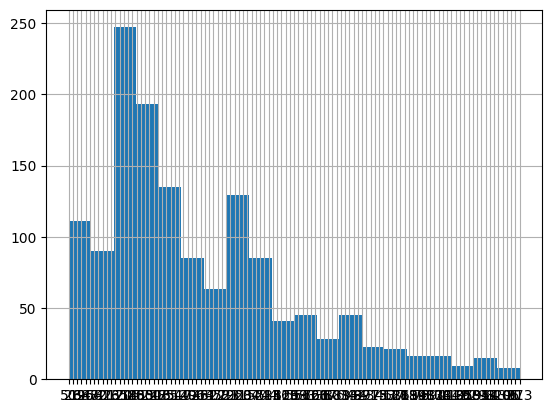

In [43]:
df[df.IBUs != 'Does not apply'].IBUs.hist(bins=20)

## Hm, Interesting distribution. List all of the beers with IBUs above the 75th percentile

- *Tip: There's a single that gives you the 25/50/75th percentile*
- *Tip: You can just manually type the number when you list those beers*

In [46]:
df[df.IBUs != 'Does not apply'].IBUs.describe()

count     1405
unique     107
top         20
freq        82
Name: IBUs, dtype: object

## List all of the beers with IBUs below the 25th percentile

## List the median IBUs of each type of beer. Graph it.

Put the highest at the top, and the missing ones at the bottom.

- Tip: Look at the options for `sort_values` to figure out the `NaN` thing. The `?` probably won't help you here.

## Hmmmm, it looks like they are generally different styles. What are the most common 5 styles of high-IBU beer vs. low-IBU beer?

- *Tip: You'll want to think about it in three pieces - filtering to only find the specific beers beers, then finding out what the most common styles are, then getting the top 5.*
- *Tip: You CANNOT do this in one command. It's going to be one command for the high and one for the low.*
- *Tip: "High IBU" means higher than 75th percentile, "Low IBU" is under 25th percentile*

## Get the average IBU of "Witbier", "Hefeweizen" and "American Pale Wheat Ale" styles

I'm counting these as wheat beers. If you see any other wheat beer categories, feel free to include them. I want ONE measurement and ONE graph, not three separate ones. And 20 to 30 bins in the histogram, please.

- *Tip: I hope that `isin` is in your toolbox*

## Draw a histogram of the IBUs of those beers

## Get the average IBU of any style with "IPA" in it (also draw a histogram)

In [47]:
df[df.Style.str.contains("IPA", na=False)].IBUs.median()

TypeError: could not convert string to float: 'Does not apply'

## Plot those two histograms on top of one another

To plot two plots on top of one another, you do two steps.

1. First, you make a plot using `plot` or `hist`, and you save it into a variable called `ax`.
2. You draw your second graph using `plot` or `hist`, and send `ax=ax` to it as a parameter.

It would look something like this:

```python
ax = df.plot(....)
df.plot(ax=ax, ....)
``` 

(...except totally different)

## Compare the ABV of wheat beers vs. IPAs : their IBUs were really different, but how about their alcohol percentage?

Wheat beers might include witbier, hefeweizen, American Pale Wheat Ale, and anything else you think is wheaty. IPAs probably have "IPA" in their name.

## Good work!

If you made it this far you deserve a drink.